# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Tomás Apablaza Arriagada
- Nombre de alumno 2: Maximiliano Quintero Ortega

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Link del repositorio:
https://github.com/Repositivo/Repositivo.git

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1( El primer conjunto sirve para que el modelo se adapte y encuentre patrones en los datos. Ajustando parámetros internos en el modelo, por lo mismo debe ser una muestra suficientemente grande y representativa. En cambio, el conjunto de validación sirve para evaluar el modelo durante el entrenamiento, ajustando los hiperparámetros del mismo y pasar por el conjunto de testing.

2) El principal desafío radica en la ausencia de etiquetas de clase que guíen el modelo en el proceso de aprendizaje. Por lo mismo su propósito es la búsqueda de estructura y patrones ocultos en los datos.

3) Es una tabla con la cual se visualiza el rendimiento y desempeño de modelos utilizados. Permitiendo a la vez calcular múltiples métricas útiles por su descomposición de los aciertos y los errores, dependiendo si los datos corresponden a una predicción del modelo o el valor de su etiqueta real.

4) Accuracy: Es el porcentaje total de aciertos en la predicción del modelo independiente de la clase a la cual representa el dato. Es decir el total de aciertos sobre el total de los casos.

Precision: Es el porcentaje de aciertos, en el conjunto de datos que el modelo considero como positivos.

Recall: Es el porcentaje de aciertos, en el conjunto de datos de etiquetas reales. Es decir la parte que el modelo fue capaz de acertar en su predicción en la clase positiva, dentro del conjunto de los que lo eran realmente.

F1: El promedio armónico entre el recall y la precision. Penalizando exageradamente cuando cualquiera de los dos es bajo.

5) Mantenimiento: Precisión, puesto que, nuestro propósito es encontrar un modelo que realmente encuentra fallas y no se equivoque, para destinar los recursos a esas fallas.

Enfermedades: Recall (o especificidad). Básicamente el mismo argumento anterior, el propósito es encontrar todas las enfermedades contagiosas, puesto que, un error puede ser fatal. Pensemos que aunque nuestra precisión sea del 100% no significa que reconoció todas la enfermedades contagiosas.

Créditos: F1-score. Nuestro enfoque es que el modelo sea capaz de encontrar todos los individuos capaces de tener un crédito de alto riesgo (recall), y también el de tener un modelo eficiente (precisión). Por lo que el promedio de las dos métricas, sería interesante. Pensemos que aunque el recall sea del 100% no significa que el modelo sea eficiente (la eficiencia interesa para el ahorro de recursos).

Crimenes:  F1-score, el propósito es tener un modelo que no se equivoque (precisión) y que logre descubrir la mayoría de los crímenes (recall).

6) Corresponde al proceso en el que se ajustan las predicciones de probabilidades del modelo, para que, reflejen realmente las probabilidades de la ocurrencia de los eventos. Es útil en situaciones en la que es necesaría una descomposición de probabilidades real, en vez de simplemente variables binarias.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/stats_players.csv")
df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

1) Generar los labels:

In [ ]:
# Creamos la variable label
df['label'] = df['National_Position'].notnull().astype(int)

# Mostramos los primeros registros para verificar
df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,0


2) Cantidad de ejemplos por clase:

In [ ]:
df["label"].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

3) Transformar variables:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder

# Seleccionar automáticamente las variables categóricas nominales
categorical_columns = df.select_dtypes(include=['object']).drop(['Name', 'National_Position'], axis=1).columns.tolist()

# Seleccionar automáticamente las variables numéricas
numeric_columns = df.select_dtypes(include=['number']).drop(["label"], axis=1).columns.tolist()

# Definir el ColumnTransformer con RobustScaler para las columnas numéricas y OneHotEncoder para las categóricas
col_transformer = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    sparse_threshold=0,
    remainder='drop'  # No mantener las columnas no especificadas
)

4) Justificar transformaciones:
-  Eliminamos la variable Name, porque correspondería al ID y este no se usa para el entrenamiento, después la podemos concatenar a la data de entrenamiento.
- Eliminamos la label y National_Position porque hacen referencia a la variable dependiente.
- A las columnas numéricas le aplicamos un Robust_Scaler, para normalizar las variables, reducir el efecto de outliers y mejorar la convergencia.
- A las columnas categóricas, le aplicamos un One Hot Encoder para que queden como variables binarias y puedan ser utilizadas para la predicción.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

1) Separar en train-test:

In [ ]:
# Holdout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

features = df.drop(columns=["label", "National_Position"])
labels = df.loc[:, "label"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=42
)

2) Definir los pipelines:

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Definir los pipelines
pipeline_xgboost = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier())
])

pipeline_lightgbm = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier())
])

3) Entrenar los pipelines:

In [ ]:
# Entrenar los pipelines
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 720, number of negative: 11063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 11783, number of used features: 136
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061105 -> initscore=-2.732110
[LightGBM] [Info] Start training from score -2.732110


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0, transformer_weights=None,
                                   transformers=[('num',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               unit_variance=False,
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Markin...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

1) Calcular accuracy, precisión y recall:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predecir las clases para los conjuntos de prueba
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Calcular métricas para XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)

# Calcular métricas para LightGBM
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm)
recall_lightgbm = recall_score(y_test, y_pred_lightgbm)

# Mostrar classification_report
print("XGBoost:")
print(classification_report(y_test, y_pred_xgboost))

print("LightGBM:")
print(classification_report(y_test, y_pred_lightgbm))


XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5450
           1       0.65      0.35      0.45       355

    accuracy                           0.95      5805
   macro avg       0.80      0.67      0.71      5805
weighted avg       0.94      0.95      0.94      5805

LightGBM:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5450
           1       0.66      0.27      0.39       355

    accuracy                           0.95      5805
   macro avg       0.81      0.63      0.68      5805
weighted avg       0.94      0.95      0.94      5805



2) Explicar resultados:

Para el modelo XGBoost:
- Un 0.95 de accuracy, indica que un 95% de los jugadores fueron predichos correctamente como seleccionados nacionales.
- Un 0.8 de precision, indica que un 80% de los jugadores predichos como seleccionados eran realmente seleccionados nacionales.
- Un 0.67 de recall indica que un 67% de los seleccionados nacionales fueron capturados por la predicción.

Similarmente para el otro modelo.

3) Para este modelo en general, nos interesa reducir la tasa de falsos positivos, debido a que no queremos seleccionar a jugadores que realmente tengan un bajo desempeño en la selección, en cambio no afecta tanto la tasa de falsos negativos, es decir, no es tan importante dejar fuera a verdaderos jugadores de selección. Por esta razón la métrica adecuada para este modelo es la precisión. En este caso el modelo con una mejor precisión es el XGBoost.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

1) Aplicar las nuevas etiquetas:

In [ ]:
# Reemplazar los valores en la columna 'Club_Position'
df2 = df.copy()
df2['Club_Position'] = df2['Club_Position'].replace({'ST': 'ataque',
                                                    'CF': 'ataque',
                                                    'LW': 'central_ataque',
                                                    'CAM': 'central_ataque',
                                                    'RW': 'central_ataque',
                                                    'RM': 'central',
                                                    'CM': 'central',
                                                    'LM': 'central',
                                                    'RWB': 'central_defensa',
                                                    'CDM': 'central_defensa',
                                                    'LWB': 'central_defensa',
                                                    'RB': 'defensa',
                                                    'CB': 'defensa',
                                                    'LB': 'defensa',
                                                    'GK': 'arquero'
                                                    })

df2

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,central_ataque,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,central_ataque,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,central_ataque,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ataque,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,arquero,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,0


2) Contar instancias por clase: (Habían varias posiciones que no fueron consideradas en el diccionario indicado en el enunciado, decidimos dejar fuera estas instancias del dataframe por simplicidad)

In [ ]:
# Filtrar los que no estaban agrupados
df2 = df2[df2["Club_Position"].isin(["ataque","central_ataque","defensa","central_defensa","central","arquero"])]

# Contar las cantidad de instancias por clase
print(df2['Club_Position'].value_counts())

Club_Position
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


3) Nuevo pipeline:

In [ ]:
# Holdout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Seleccionar automáticamente las variables categóricas nominales
categorical_columns = df2.select_dtypes(include=['object']).drop(['Name', 'National_Position','Club_Position'], axis=1).columns.tolist()

# Seleccionar automáticamente las variables numéricas
numeric_columns = df2.select_dtypes(include=['number']).drop(["label"], axis=1).columns.tolist()

# Definir el ColumnTransformer con RobustScaler para las columnas numéricas y OneHotEncoder para las categóricas
col_transformer = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    sparse_threshold=0,
    remainder='drop'  # No mantener las columnas no especificadas
)

# Separar en train-test
features = df2.drop(columns=["Club_Position", "National_Position", "label"])
labels = df2.loc[:, "Club_Position"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=42
)

# Crear Pipeline ocupando LinearSVC como modelo
pipeline_LinearSVC = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', LinearSVC())
])

# Entrenar los pipelines
pipeline_LinearSVC.fit(X_train, y_train)

# Predecir las clases para los conjuntos de prueba
y_pred_LinearSVC = pipeline_LinearSVC.predict(X_test)

# Calcular métricas para LinearSVC
accuracy_LinearSVC = accuracy_score(y_test, y_pred_LinearSVC)
precision_LinearSVC = precision_score(y_test, y_pred_LinearSVC, average='macro')
recall_LinearSVC = recall_score(y_test, y_pred_LinearSVC, average='macro')

# Mostrar classification_report
print("LinearSVC:")
print(classification_report(y_test, y_pred_LinearSVC))

LinearSVC:
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       209
         ataque       0.75      0.80      0.78       142
        central       0.59      0.56      0.57       299
 central_ataque       0.47      0.36      0.41       192
central_defensa       0.38      0.17      0.24        69
        defensa       0.80      0.97      0.87       389

       accuracy                           0.73      1300
      macro avg       0.66      0.65      0.65      1300
   weighted avg       0.71      0.73      0.71      1300



4) Comentar resultados:

Podemos notar que el modelo predijo algunas posiciones mejores que otras, por ejemplo predijo perfectamente a los arqueros, debido a que estos tienen características muy diferentes al resto de jugadores. En cambio tuvo más dificultad al predecir posiciones similares como, "ataque" y "central_ataque". Finalmente el modelo obtiene un accuracy de 0,73 debido a este desbalance de clases.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

3. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

4. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [ ]:
#%pip install pycaret

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 38)"
4,Transformed data shape,"(17588, 46)"
5,Transformed train set shape,"(12311, 46)"
6,Transformed test set shape,"(5277, 46)"
7,Numeric features,33
8,Categorical features,4
9,Rows with missing values,0.0%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9517,0.9570,0.4255,0.6617,0.5177,0.4935,0.5070,1.5440
xgboost,Extreme Gradient Boosting,0.9503,0.9563,0.4374,0.6347,0.5176,0.4924,0.5020,0.8960
rf,Random Forest Classifier,0.9475,0.9433,0.2367,0.7150,0.3550,0.3348,0.3917,2.5220
et,Extra Trees Classifier,0.9416,0.9393,0.1064,0.6327,0.1819,0.1672,0.2427,2.3620
dt,Decision Tree Classifier,0.9329,0.7143,0.4653,0.4507,0.4577,0.4219,0.4221,0.3780


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

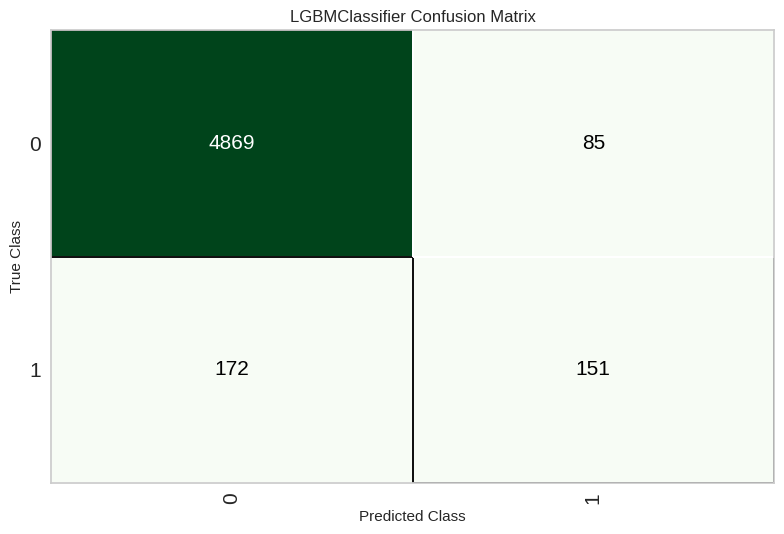

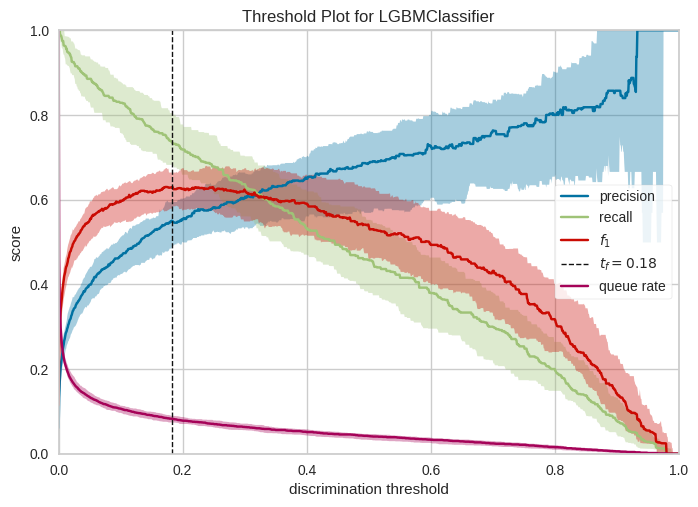

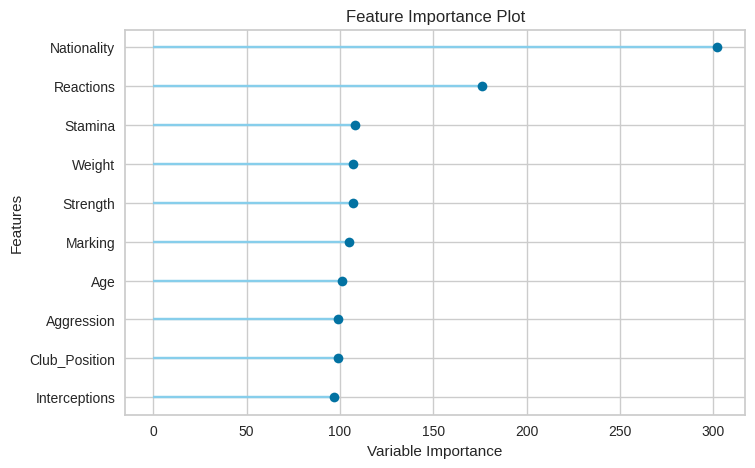

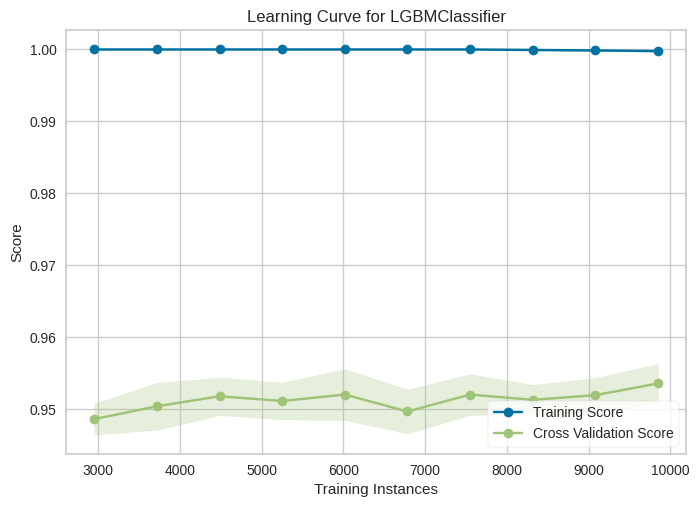

In [ ]:

import pandas as pd
from pycaret.classification import *

df_copy = df.drop(columns=['Name', 'National_Position'])

exp_clf = setup(data=df_copy, target='label', session_id=123,
                fold_strategy='stratifiedkfold', fold=5)


models_to_compare = ['et', 'rf', 'dt', 'xgboost', 'lightgbm']
best_model = compare_models(include=models_to_compare)


evaluate_model(best_model)

confusion_matrix = plot_model(best_model, plot='confusion_matrix')
threshold_plot = plot_model(best_model, plot='threshold')
feature_importance = plot_model(best_model, plot='feature')
learning_curve = plot_model(best_model, plot='learning')

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

# 1)

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score





X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(columns=["label"]), df["label"], test_size=0.2, random_state=42)


X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)


xgb_model = XGBClassifier()
xgb_model.fit(X_train_transformed, y_train)

y_pred = xgb_model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo XGBoost después de aplicar transformaciones:", accuracy)


precision_original = precision_score(y_test, y_pred)

f1_score_original = f1_score(y_test, y_pred)

print("Precisión del modelo original:", precision_original)
print("F1 score del modelo original:", f1_score_original)

Precisión del modelo XGBoost después de aplicar transformaciones: 0.9553723706651507
Precisión del modelo original: 0.648
F1 score del modelo original: 0.5078369905956113


# 2) Ordenamos la variables segun su orden de importancia

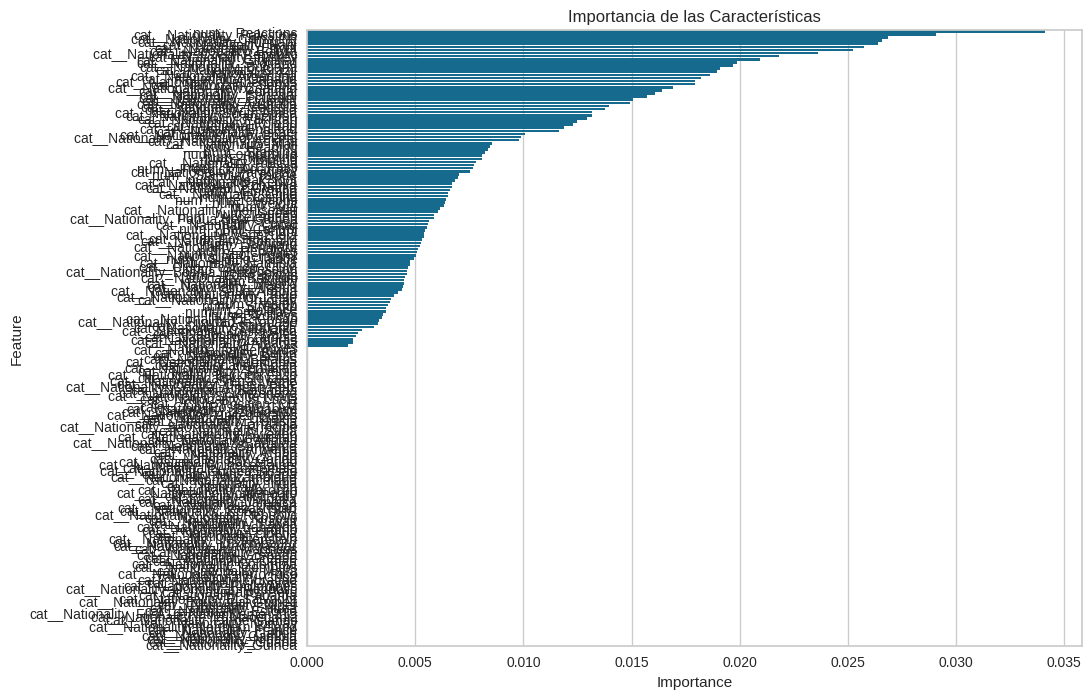

Características clasificadas por importancia:
Index(['num__Reactions', 'cat__Nationality_Palestine',
       'cat__Nationality_China PR', 'cat__Nationality_Hungary',
       'cat__Nationality_Haiti', 'cat__Nationality_Egypt',
       'cat__Nationality_Bolivia', 'cat__Nationality_Czech Republic',
       'cat__Nationality_Turkey', 'cat__Nationality_Gibraltar',
       ...
       'cat__Nationality_FYR Macedonia', 'cat__Nationality_Faroe Islands',
       'cat__Nationality_Norway', 'cat__Nationality_Northern Ireland',
       'cat__Nationality_France', 'cat__Nationality_Gabon',
       'cat__Nationality_Gambia', 'cat__Nationality_Nigeria',
       'cat__Nationality_Ghana', 'cat__Nationality_Guinea'],
      dtype='object', length=198)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


feature_importance = xgb_model.feature_importances_


sorted_indices = feature_importance.argsort()[::-1]
sorted_features = df_transformed.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Importance': sorted_importance
})


plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()

print("Características clasificadas por importancia:")
print(sorted_features)



# 3) Eligimos las vairbles cuya importancia sea mayor a un epsilon

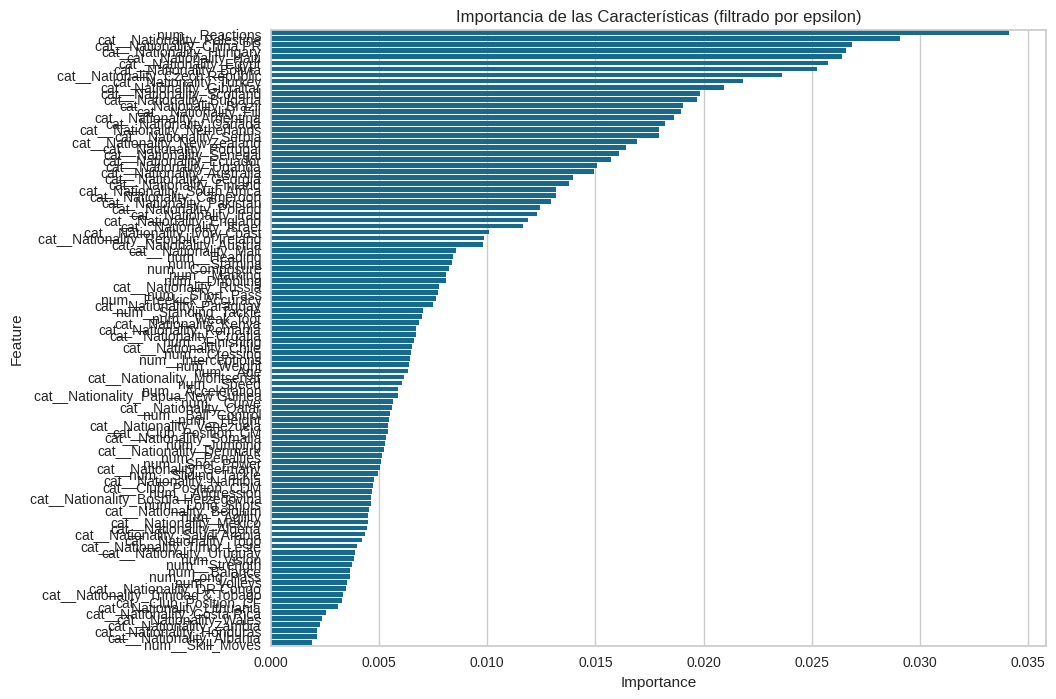

Características clasificadas por importancia (filtrado por epsilon):
Index(['num__Reactions', 'cat__Nationality_Palestine',
       'cat__Nationality_China PR', 'cat__Nationality_Hungary',
       'cat__Nationality_Haiti', 'cat__Nationality_Egypt',
       'cat__Nationality_Bolivia', 'cat__Nationality_Czech Republic',
       'cat__Nationality_Turkey', 'cat__Nationality_Gibraltar',
       ...
       'cat__Nationality_DR Congo', 'cat__Nationality_Trinidad & Tobago',
       'cat__Club_Position_CF', 'cat__Nationality_Lithuania',
       'cat__Nationality_Costa Rica', 'cat__Nationality_Wales',
       'cat__Nationality_Zambia', 'cat__Nationality_Honduras',
       'cat__Nationality_Albania', 'num__Skill_Moves'],
      dtype='object', length=102)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

epsilon = 0.001

feature_importance = xgb_model.feature_importances_

sorted_indices = feature_importance.argsort()[::-1]
sorted_features = df_transformed.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

important_features = sorted_features[sorted_importance > epsilon]
important_importance = sorted_importance[sorted_importance > epsilon]

importance_df = pd.DataFrame({
    'Feature': important_features,
    'Importance': important_importance
})

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características (filtrado por epsilon)')
plt.show()

print("Características clasificadas por importancia (filtrado por epsilon):")
print(important_features)


# 4) Ejecutamos el codigo con estas variables seleccionadas

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(df_transformed[important_features], df["label"], test_size=0.2, random_state=42)


xgb_model_selected = XGBClassifier()
xgb_model_selected.fit(X_train, y_train)


y_pred_selected = xgb_model_selected.predict(X_test)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Precisión del modelo XGBoost con características seleccionadas:", accuracy_selected)


precision_selected = precision_score(y_test, y_pred_selected)


f1_score_selected = f1_score(y_test, y_pred_selected)

print("Precisión del modelo con características seleccionadas:", precision_selected)
print("F1 score del modelo con características seleccionadas:", f1_score_selected)


Precisión del modelo XGBoost con características seleccionadas: 0.9488345650938033
Precisión del modelo con características seleccionadas: 0.5648148148148148
F1 score del modelo con características seleccionadas: 0.40397350993377484


# 5)

5.1) El modelo con reducción de dimensionalidad tiene una precisión levemente menor al modelo original con todas las características, a nivel de robustez, el modelo con reducción de dimensionalidad debería ser un poco menos robusto, debido a que puede tener una mayor variación al conjunto datos, debido a que deja algunas variables menos importantes fuera.

5.2) Los beneficios potenciales de eliminar variables del modelo incluyen una simplificación del modelo, lo que puede facilitar su interpretación y explicación. Además, la reducción del tiempo de entrenamiento y la mejora en la capacidad de generalización también son posibles beneficios.

5.3) Un modelo con menor dimensionalidad es más sencillo de explicar, ya que reduce la complejidad y la cantidad de información que se debe tener en cuenta al interpretar su comportamiento. La eliminación de características irrelevantes o redundantes puede simplificar la comprensión del modelo y hacer que sea más fácil explicar cómo toma decisiones.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

In [ ]:
print("Columnas de X_train:")
print(X_train.columns)

print("Columnas de X_test:")
print(X_test.columns)

Columnas de X_train:
Index(['num__Reactions', 'cat__Nationality_Palestine',
       'cat__Nationality_China PR', 'cat__Nationality_Hungary',
       'cat__Nationality_Haiti', 'cat__Nationality_Egypt',
       'cat__Nationality_Bolivia', 'cat__Nationality_Czech Republic',
       'cat__Nationality_Turkey', 'cat__Nationality_Gibraltar',
       ...
       'cat__Nationality_DR Congo', 'cat__Nationality_Trinidad & Tobago',
       'cat__Club_Position_CF', 'cat__Nationality_Lithuania',
       'cat__Nationality_Costa Rica', 'cat__Nationality_Wales',
       'cat__Nationality_Zambia', 'cat__Nationality_Honduras',
       'cat__Nationality_Albania', 'num__Skill_Moves'],
      dtype='object', length=102)
Columnas de X_test:
Index(['num__Reactions', 'cat__Nationality_Palestine',
       'cat__Nationality_China PR', 'cat__Nationality_Hungary',
       'cat__Nationality_Haiti', 'cat__Nationality_Egypt',
       'cat__Nationality_Bolivia', 'cat__Nationality_Czech Republic',
       'cat__Nationality_Turkey', '

**Respuesta**

Brier Score antes de la calibración: 0.0371767970235716
Brier Score después de la calibración: 0.0356119007665882


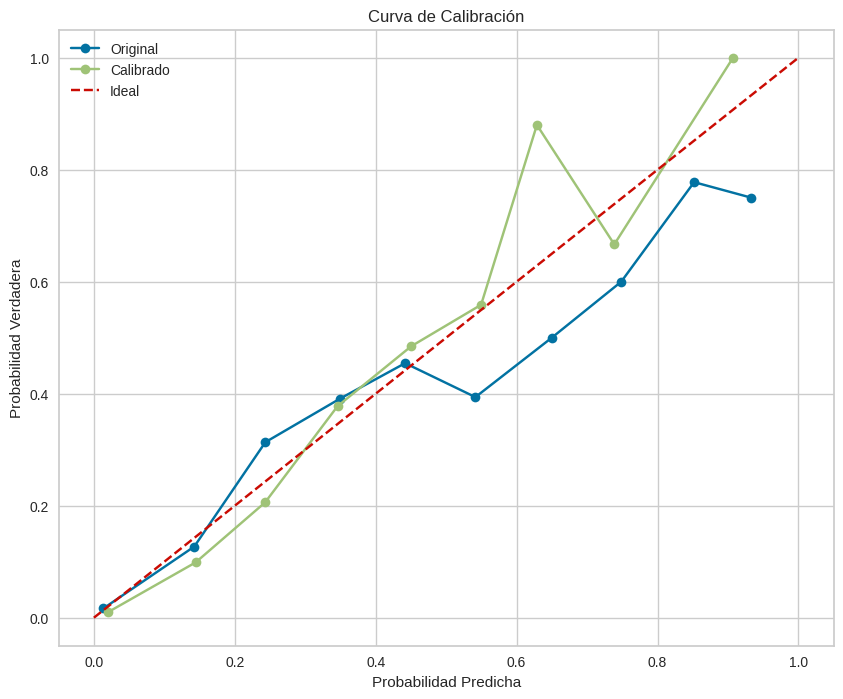

Brier Score antes de la calibración: 0.0371767970235716
Brier Score después de la calibración: 0.0356119007665882


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, brier_score_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = xgb_model_selected.predict_proba(X_test)[:, 1]

brier_score_before = brier_score_loss(y_test, y_pred_prob)
print("Brier Score antes de la calibración:", brier_score_before)

calibrated_model = CalibratedClassifierCV(xgb_model_selected, method='isotonic', cv=5)
calibrated_model.fit(X_train, y_train)

y_calibrated_prob = calibrated_model.predict_proba(X_test)[:, 1]

brier_score_after = brier_score_loss(y_test, y_calibrated_prob)
print("Brier Score después de la calibración:", brier_score_after)

prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_calibrated_prob, n_bins=10)

plt.figure(figsize=(10, 8))
plt.plot(prob_pred, prob_true, marker='o', label='Original')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='Calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', label='Ideal')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Probabilidad Verdadera')
plt.legend()
plt.show()

print("Brier Score antes de la calibración:", brier_score_before)
print("Brier Score después de la calibración:", brier_score_after)

Se observa como la curva calibrada se acerca más a la curva ideal y el brier score es menor despues de la calibración lo que implica que las probabilidades predichas por el modelo calibrado son más confiables y están mejor alineadas con la probabilidad real de ocurrencia de los eventos.